# CHAPTER 10- SIMPLE LINEAR REGRESSION

## By Emma Gellis

## What does a Simple Linear Regression Model do?
#### A simple linear regression model is a model that uses a line equation to predict one unknown variable called an dependent variable based on the value of one known variable called an independent variable. 

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [80]:
data = sns.load_dataset('diamonds') 

In [82]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* The r-value is a value that measures the type and strength of the correlation between the dependent and independent variables.
* The range of the r-value is between 1.0 and -1.0.
* For a positive correlation, the r values are closer to 1.0.
* For a negative correlation, the r values are closer to -1.0.
* When there is no correlation, the r values are closer to 0.  

In [85]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix.head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

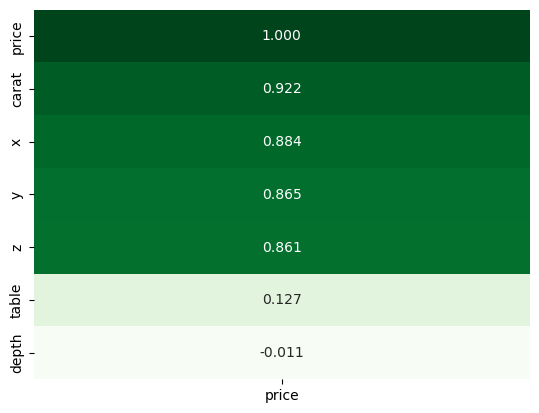

In [87]:
sns.heatmap(data=price_corr, annot=True, cmap='Greens', cbar=False, fmt='.3f')

## Procedure for Creating and Using a Regression Model
1. Split: The dataset is split into a training dataset which is used to train the model and test a dataset.
2. Fit: The training dataset is then used to create the regression model.
3. Score: The test dataset is run against the model in order to test the accuracy of the results of the model.
4. Predict: if the model is valid, then model can be used to predict the dependent variable based on the independent variables. 

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [202]:
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr(numeric_only=True)
strongest_corr_col = corr_matrix['price'].drop('price').abs().idxmax()
x = numeric_data[[strongest_corr_col]]
y = numeric_data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)

In [204]:
linearmodel = LinearRegression()
LinearRegression()

LinearRegression()

In [206]:
linearmodel.fit(x_train, y_train)

LinearRegression()

In [208]:
linearmodel.score(x_test, y_test)

0.8504107786474794

In [210]:
y_predicted = linearmodel.predict(x_test) 
y_predicted

array([9540.64191438, 1940.07543252, 3180.98424589, ..., 9618.19871522,
       -464.18539337, 5507.68827094])

In [236]:
predicted_data = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted_data.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [238]:
combined_data = predicted_data.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head()

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [240]:
melted_data = pd.melt(combined_data, id_vars=['carat'], value_vars=['price', 'predicted_price'], var_name='price_type',value_name='price_value')
melted_data

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


C:\Users\Emma\AppData\Local\Temp\ipykernel_19540\3096050823.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted_data, x='carat', y='price_value', hue='price_type', ci=None)


<Axes: xlabel='carat', ylabel='price_value'>

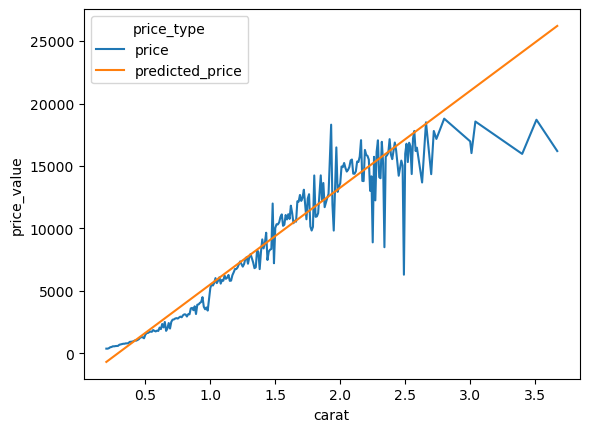

In [246]:
sns.lineplot(data=melted_data, x='carat', y='price_value', hue='price_type', ci=None)

## Regression line equation is y= mx + b
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept** 

In [250]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [252]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [324]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454575


In [332]:
x = 0.70
y = predicted.coef_[0] * x + predicted.intercept_

print(f"The estimated price of a {x:.2f} carat diamond is ${y:.2f}")

The estimated price of a 0.70 carat diamond is $3173.14


In [334]:
x = 0.54
y = predicted.coef_[0] * x + predicted.intercept_

print(f"The estimated price of a {x:.2f} carat diamond is ${y:.2f}")

The estimated price of a 0.54 carat diamond is $1932.11


### The estimates in the previous two cells are close to the estimated predicted prices but not exact. 